In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Pseudocode for the Bisection Method

The bisection method is an iterative algorithm used to find a root of a continuous function $f(x)$ within an interval $[a, b]$ where $f(a)$ and $f(b)$ have opposite signs. The pseudocode for the method is as follows:

1. **Input:**
   - Function $f(x)$
   - Interval endpoints $a$ and $b$ such that $f(a) \cdot f(b) < 0$ (i.e. such that $f(x)$ changes sign within the interval $a<x<b$)
   - Tolerance $\epsilon$ (default: $1 \times 10^{-5}$)
   - Maximum iterations $\text{max\_iter}$ (default: 100)

2. **Initial Check:**
   - If $f(a) \cdot f(b) \geq 0$, raise an error because the function must change sign over the interval.

3. **Initialization:**
   - Set iteration counter $\text{num\_iter} = 0$
   - Compute the initial midpoint: 
     $$
     c = \frac{a + b}{2}
     $$

4. **Iteration Loop:**
   - **While** $|f(c)| > \epsilon$ **and** the half-width of the interval $\frac{b - a}{2} > \epsilon$ **and** $\text{num\_iter} < \text{max\_iter}$:
     - Update the midpoint:
       $$
       c = \frac{a + b}{2}
       $$
     - **If** $f(a) \cdot f(c) < 0$:
       - Set $b = c$ (the root lies between $a$ and $c$)
     - **Else:**
       - Set $a = c$ (the root lies between $c$ and $b$)
     - Increment the iteration counter:
       $$
       \text{num\_iter} = \text{num\_iter} + 1
       $$

5. **Output:**
   - Print a message indicating that the bisection method has converged, displaying the approximate root $c$ and the number of iterations used.
   - Return the computed root $c$.



In [48]:
def bisection_method(f, a, b, epsilon=1e-5, max_iter=100):
    """
    Find a root of the continuous function f in the interval [a, b] using the bisection method.

    This function repeatedly bisects the interval and selects the subinterval in which the 
    function changes sign, thereby converging to a root of f. The iteration stops when the 
    function value at the midpoint is within the specified tolerance or when the interval 
    width becomes sufficiently small.

    Parameters:
        f (function): The continuous function for which a root is sought.
        a (float): The lower bound of the interval.
        b (float): The upper bound of the interval.
        epsilon (float, optional): The tolerance for convergence. Defaults to 1e-5.
        max_iter (int, optional): The maximum number of iterations to perform. Defaults to 100.

    Returns:
        float: The approximate root of the function f.

    Raises:
        ValueError: If f(a) and f(b) do not have opposite signs.
    """
    if f(a) * f(b) >= 0:
        raise ValueError("The function must have different signs at a and b.")

    num_iter = 0
    c = (a + b) / 2.0  # initial midpoint

    while abs(f(c)) > epsilon and (b - a) / 2.0 > epsilon and num_iter < max_iter:
        c = (a + b) / 2.0
        if f(a) * f(c) < 0:
            b = c  # the root is between a and c
        else:
            a = c  # the root is between c and b
        num_iter += 1

    if num_iter == max_iter:
        print(f"Maximum iterations reached: The approximate root is x = {c} after {num_iter} iterations.")
    else:
        print(f"Bisection method converged: The approximate root is x = {c} after {num_iter} iterations.")
    
    return c


# Example - A Quadratic Function

Consider the quadratic

$$ f(x) = x^2 -6x + 5 $$

By applying the quadratic formula or factorising, we can show **analytically** that the roots of $f$ (solutions of $f(x)=0$) are:
- $x=1$ and
- $x=5$

The bisection method can be used to instead find these solutions **numerically**. 

In practice, numerical methods are used for equations that are very hard or impossible to solve analytically (i.e. harder than quadratics...)

We will numerically find one of the solutions of $f(x)= 0$ by choosing $a=3$, $b=6$, noting that $f(x)$ changes sign on $3<x<6$ and applying the bisection method.

### Exercise 1:

1) Show analytically that the roots of $f$ are $x=1$ and $x=5$.

2) Evaluate the numbers $f(3)$ and $f(6)$.

3) Explain why there must therefore be a solution of $f(x)=0$ between $3 < x < 6$.  
   (We of course already know that this solution is $x=5$ from part 1.)


1.

2.

3.

In [49]:
def func(x):
    return x**2 - 6*x + 5

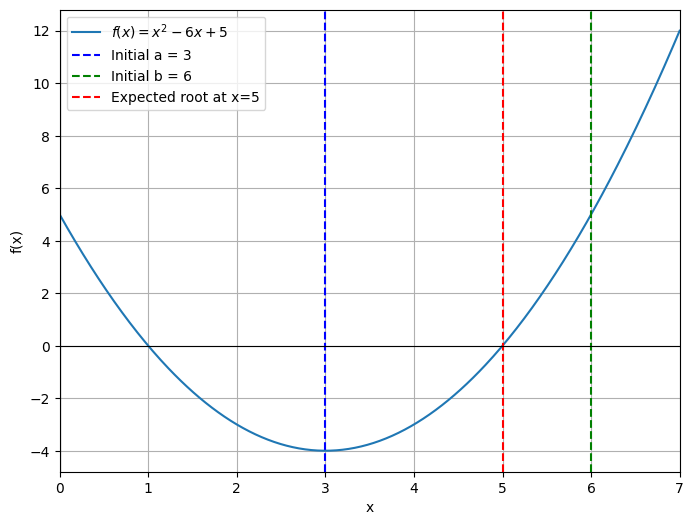

In [50]:
x_vals = np.linspace(0, 7, 400)
y_vals = func(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label=r'$f(x) = x^2 - 6x + 5$')

# Indicate initial values of a and b with vertical dashed lines
plt.axvline(x=3, color='blue', linestyle='--', label='Initial a = 3')
plt.axvline(x=6, color='green', linestyle='--', label='Initial b = 6')

# Mark the expected root at x=5 with a red dashed line
plt.axvline(x=5, color='red', linestyle='--', label='Expected root at x=5')

# Add x-axis and y-axis lines
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)

plt.xlim([0, 7])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


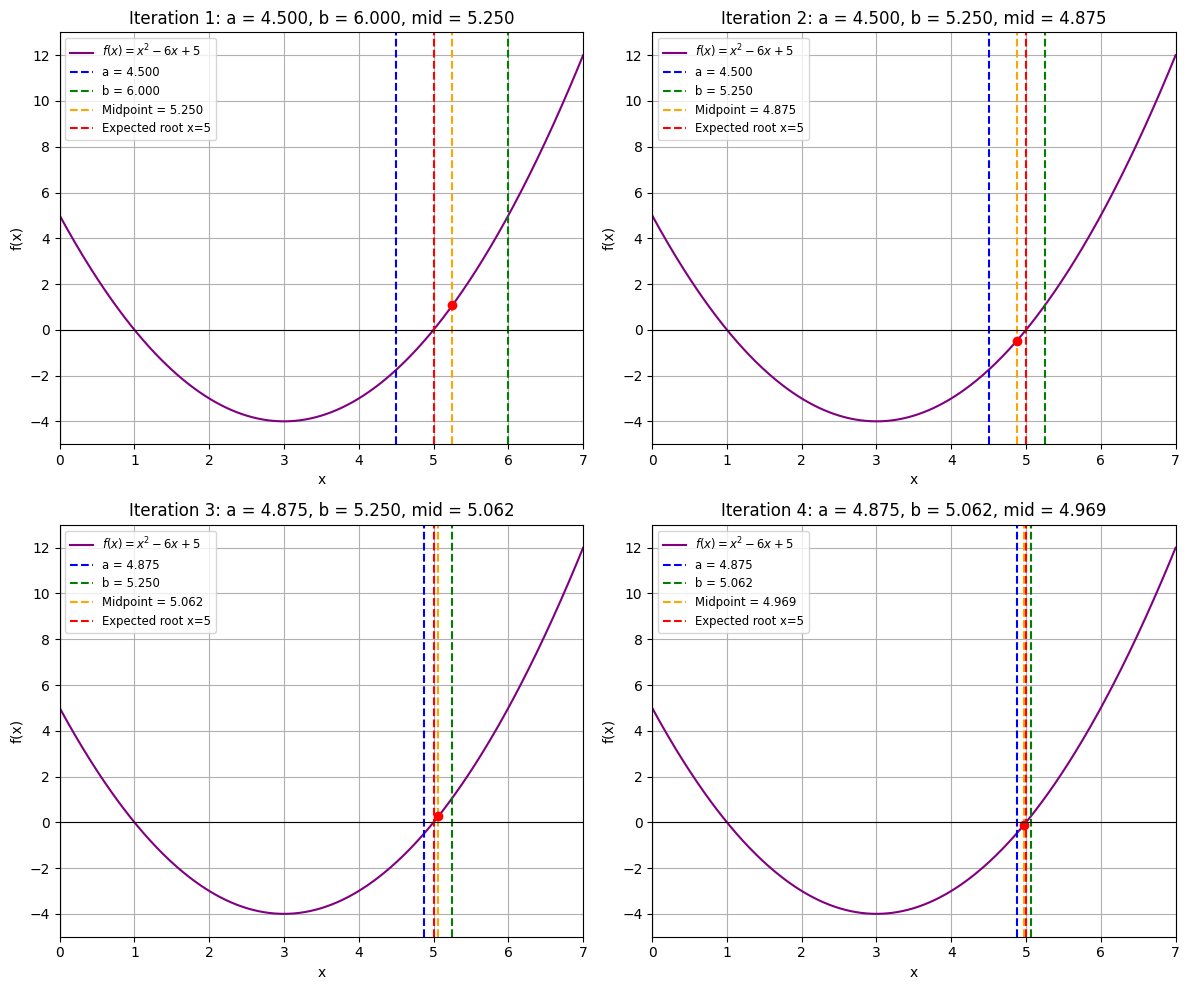

In [51]:
# Starting interval
a = 3
b = 6

# We'll record the updated interval endpoints and midpoint after each iteration.
iterations = []

# Perform 4 iterations of the bisection method.
for i in range(4):
    c = (a + b) / 2  # Compute the midpoint of the current interval.
    # Decide which half to keep: check the sign of f(a)*f(c).
    if func(a) * func(c) < 0:
        b = c  # The root lies between a and c.
    else:
        a = c  # The root lies between c and b.
    # For visualization, we compute the midpoint of the updated interval.
    midpoint = (a + b) / 2
    iterations.append((a, b, midpoint))

# Set up a 2x2 grid of subplots with the same axis scales.
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Generate x and y values for the function plot.
x_vals = np.linspace(0, 7, 400)
y_vals = func(x_vals)

# Fixed axis limits for consistency.
xlim = (0, 7)
ylim = (-5, 13)

for i, ax in enumerate(axes):
    a_i, b_i, mid = iterations[i]
    
    # Plot the function.
    ax.plot(x_vals, y_vals, label=r'$f(x) = x^2 - 6x + 5$', color='purple')
    
    # Mark the current interval endpoints.
    ax.axvline(x=a_i, color='blue', linestyle='--', label=f'a = {a_i:.3f}')
    ax.axvline(x=b_i, color='green', linestyle='--', label=f'b = {b_i:.3f}')
    
    # Mark the midpoint of the current interval.
    ax.axvline(x=mid, color='orange', linestyle='--', label=f'Midpoint = {mid:.3f}')
    ax.plot(mid, func(mid), 'ro')  # Mark the point (mid, f(mid)).
    
    # Mark the expected root at x = 5.
    ax.axvline(x=5, color='red', linestyle='--', label='Expected root x=5')
    
    # Draw x-axis and y-axis lines.
    ax.axhline(0, color='black', linewidth=0.8)
    ax.axvline(0, color='black', linewidth=0.8)
    
    # Set fixed limits and labels.
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title(f'Iteration {i+1}: a = {a_i:.3f}, b = {b_i:.3f}, mid = {mid:.3f}')
    ax.legend(fontsize='small', loc='upper left')
    ax.grid(True)

plt.tight_layout()
plt.show()


Bisection method converged: The approximate root is x = 5.000003814697266 after 18 iterations.


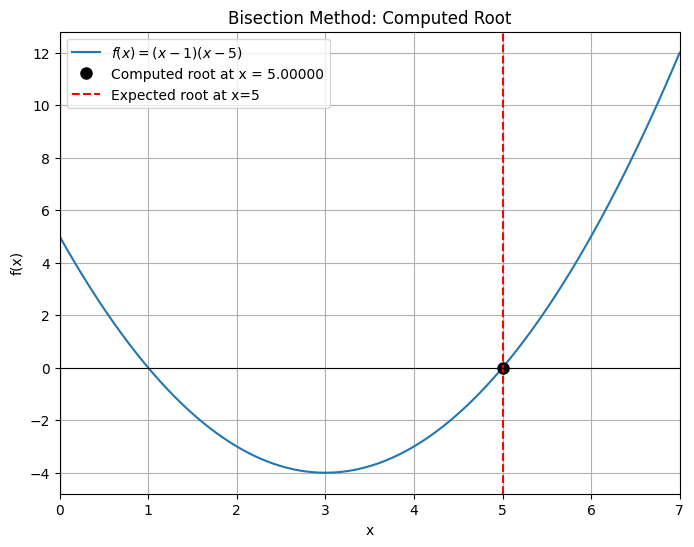

In [54]:
# Choose an interval that brackets the root at x = 5. For example, [3, 6]:
computed_root = bisection_method(func, 3, 6, epsilon=1e-5, max_iter=100)

# Prepare data for plotting.
x_vals = np.linspace(0, 7, 400)
y_vals = func(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label=r'$f(x) = (x-1)(x-5)$')

# Plot the computed root as a black circle.
plt.plot(computed_root, func(computed_root), 'ko', markersize=8, 
         label=f'Computed root at x = {computed_root:.5f}')

# Mark the expected root at x=5 with a red dashed line.
plt.axvline(x=5, color='red', linestyle='--', label='Expected root at x=5')
# Add x-axis and y-axis lines
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)

plt.xlim([0, 7])
plt.title('Bisection Method: Computed Root')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

### Exercise 2: A Single Root Cubic

Consider the cubic function 
$$
g(x) = 3x^3 + 4x^2 + 3x + 4
$$

**Numerically**:
1. Use matplotlib to draw a graph of $y=g(x)$ on the interval $[-3, 3]$. Inspect your graph visually to approximate the solution of the equation $g(x)=0$
2. Identify an interval on which we can apply the bisection method (i.e. appropriate values of $a$ and $b$)
3. Call the `bisection_method` function defined above to numerically solve the equation $g(x) = 0$.
4. Draw your graph of $y=g(x)$ again, but this time labelling the root numerically found by the bisection method. Is it where you expected it to be?

**Analytically** (optional):
1. Prove that the function $g(x) = 3x^3 + 4x^2 + 3x + 4$ has only one real root.
2. Analytically solve the equation $g(x) = 0$.

### Exercise 3: A Triple Root Cubic

Consider the cubic function 
$$
h(x) = 24x^3 -14x^2 - 11x + 6
$$

**Numerically**:
1. Use matplotlib to draw a graph of $y=h(x)$ on the interval $[-5,5]$. Inspect your graph visually to approximate the solution**s** of the equation $h(x)=0$
2. Identify 3 intervals on which we can apply the bisection method to find the three roots of $h$ (i.e. appropriate values of $a$ and $b$)
3. Call the `bisection_method` function defined above three times to numerically solve the equation $h(x) = 0$.
4. Draw your graph of $y=h(x)$ again, but this time labelling the root**s** numerically found by the bisection method. Are the roots where you expected them to be?

**Analytically** (optional):

We've seen examples of cubic functions with a single real root and with three different real roots. 

1. Do there exist cubic functions with two real roots? Either provide an example or prove that this cant happen.

2. Do there exist cubic functions with zero real roots? Either provide an example or prove that this cant happen.

3. Do there exist cubic functions with more than three real roots? Either provide an example or prove that this cant happen.